In [17]:
import numpy as np
import random
import sys
from scipy.stats import f
from scipy.stats import norm

#param = int(sys.argv[i])
param=2
np.random.seed(param)
n=500 # mediciones efectuadas
p=50 # variables medidas
mu=0.0
sigma=1.0
listF=[]
listR=[]
listR1=[]
for j in range(100):
    X=np.random.normal(mu,sigma,size=(n,p))
    Y=np.random.normal(mu,sigma,size=(n,1))
    XT=X.T
    YT=Y.T
    Inv=np.linalg.inv(np.matmul(XT,X))
    beta1=np.matmul(Inv,XT)
    beta=np.matmul(beta1,Y)
    Hhat=np.matmul(X,beta1)
    Yideal=np.matmul(X,beta)

    SST1=np.matmul(np.identity(n)-(1.0/n)*np.ones((n,n)),Y)
    SST=np.matmul(YT,SST1)
    SSR1=np.matmul(Hhat-(1.0/n)*np.ones((n,n)),Y)
    SSR=np.matmul(YT,SSR1)
    SSE1=np.matmul(np.identity(n)-Hhat,Y)
    SSE=np.matmul(YT,SSE1)

    Rsq=SSR[0,0]/SST[0,0]
    listR.append(Rsq)

    sigma2=SSE[0,0]/(n-1.)
    sigmamatrix=sigma2*Inv
    sigma_i=np.zeros(p)
    for i in range(p):
        sigma_i[i]=sigmamatrix[i,i]
    sigma_i=np.sqrt(sigma_i)

    MSE=SSE[0,0]/(n-p-1)
    # Calculamos el MSR
    MSR=SSR[0,0]/p
    # Calculamos el MST
    MST=SST[0,0]/(n-1)

    F=(Rsq*(n-p-1))/((1-Rsq)*p)
    listF.append(F)

    Rango=0.9 # se define un rango, es decir cuanto porcentaje de la curva se quiere
    Ftest=f.ppf(Rango,p,n-(p+1))
    P_i=np.zeros(p)
    if F > Ftest:
        tzeros=beta[:,0]/sigma_i
        P_value=2*(1-norm.cdf(tzeros)) # se integran las colas
        for i in range(p):
            if P_value[i]<0.5:
                P_i[i]=1
            else:
                P_i[i]=0
    else:
        print("paila")
        #quit()
        p_prime=np.sum(P_i)
    F_new=np.zeros(int(p_prime))
    
        
X_new=np.zeros((n,int(p_prime)))
aux=0
for i in range(p):
    if P_i[i]==1:
        X_new[:,aux]=X[:,i]
        aux+=1
X_newT=X_new.T
Inv_new=np.linalg.inv(np.matmul(X_newT,X_new))
beta1_new=np.matmul(Inv_new,X_newT)

In [14]:
listR

[0.08109846778318373,
 0.09167033005323251,
 0.121880144160189,
 0.10867439961661776,
 0.1101294520901576,
 0.06728861923044582,
 0.09232973459128886,
 0.09465499698968163,
 0.10900120142556975,
 0.08917545065358744,
 0.08822411027019483,
 0.09042454897400193,
 0.11981382862447658,
 0.09540994198274018,
 0.11206772034188345,
 0.09134096203881148,
 0.10525833776863526,
 0.12130573378952282,
 0.06267122059752388,
 0.09515294013565809,
 0.14876676804167185,
 0.11527863506937266,
 0.12588204530474909,
 0.10717333809407903,
 0.11677358232931581,
 0.10217475758888787,
 0.07652044319825373,
 0.09573858470872636,
 0.12058092975371115,
 0.07309840787995309,
 0.09257914920237433,
 0.08760990949733831,
 0.06744164445960026,
 0.13750309456862675,
 0.08173374693708624,
 0.09910829831356603,
 0.13220737021232146,
 0.09070531908270144,
 0.09852359508753067,
 0.0765418000159518,
 0.12383350201543637,
 0.06554350537046381,
 0.10373740048808351,
 0.10224902205452036,
 0.11025113494489154,
 0.09319763127

In [9]:
np.random.seed(3)

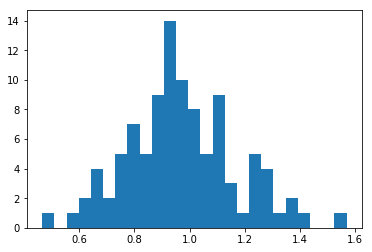

In [15]:
import matplotlib.pyplot as plt
plt.figure()
_=plt.hist(listF, bins=25)


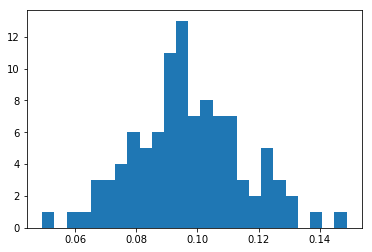

In [16]:
plt.figure()
_=plt.hist(listR, bins=25)

paila
